In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install trueskill

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import trueskill

In [3]:
# this is a flag to determine whether to filter results
# by computer and information science professionals

cis_filter = True
cis_keys = [
  'uyqyE4AvusMPYZQArTbkfmAhUhF3',
  'uH1zIWLCtqZE0N4o7Ll72ISAJYu2',
  'tA5qNXXDctSoqUZ3H0kAMyIoBBY2',
  'sOAJkvVchGS7TOYds8xPgN7uJ643',
  'lI9BilH0mUd4ziejXki7G80VBsK2',
  'l5SLxuaczFg8yWrZYXhet9EUnp03',
  'jgrtivnLi5dL5h3UohMTd9cVprT2',
  'jIZRP82KEvQwSiVPKFaQM7BETUW2',
  'irXPhc2VyyXgen8SaUSDhISQUO23',
  'fs040kQL4KX7tyVaLaYEhueuW763',
  'eR7J1g9KOJXapQZ33L27RG7b7gP2',
  'bWOGKJVHxDNrJuRuaJJNimK9git2',
  'auvrWmJMOyZtNjof8gVg6rpxInw1',
  'WXZTBQOYfOU9U3HomAtmCvsS5FN2',
  'UcN3qSDS2MR0rEOYDjXbAmWsew82',
  'T4KCQEZzqYT1QXCOLc1a0hFk8IO2',
  'SV34N6yAnzO4vZM09fGZxuKPngj1',
  'PYYIhrM9GwSP0ps13SmT7ognSxm2',
  'KcpJyQWpvKWr948uqvUIfhpGg7R2',
  'KM4H3phtSdbcbd4N0L3ejpzzFTe2',
  'Fata8XPnZmgsP1sXkOtXWKTflGn1',
  '4ulYCyCNb5blwbRlJNTzrIx0YJE3',
  '3PlYD1PUI9NIKrbmZ8IaY1IZTer2'
]

# reads evaluation data and treats it

In [4]:
import json

f = open('dump.json', 'r')

data = json.load(f)['official_test']
f.close()

In [5]:
ref = ['Educational tools about the effects and causes of climate change',
'Power aware computing',
'Electric vehicles',
'Turn off devices when not in use',
'Switch to renewable energy',
'Smart infrastructure',
'Reducing emissions',
'Design computers/electronics for disassembly/deconstruction',
'Reshape our cities to be less car-dependent',
'Implement a carbon tax',
'Remote work',
'Decentralized energy production and distribution systems',
'Disincentivize meat-based diets',
'Vote for climate-change oriented politicians',
'Cut on consumption']

## Captures matches' data

In [6]:
matches = []

for key in data:
  if 'answers' in data[key]:

    # are we filtering cis professionals?
    if cis_filter and not key in cis_keys:
      continue
      
    if len(data[key]['answers']) > 0:
      for i in range(len(data[key]['answers'])):
        answer = data[key]['answers'][i]        
        p0 = answer['current_pair_of_indexes'][answer['selected_option_index']]
        if answer['selected_option_index'] == 0:
          p1 = answer['current_pair_of_indexes'][1]
        else:
          p1 = answer['current_pair_of_indexes'][0]
        matches.append((p0,p1))
        
print(matches)

[(12, 11), (0, 6), (13, 6), (2, 11), (3, 11), (4, 13), (8, 6), (10, 13), (7, 6), (5, 6), (14, 4), (0, 2), (11, 4), (11, 14), (12, 14), (6, 3), (14, 2), (3, 7), (7, 13), (8, 11), (9, 0), (4, 6), (5, 2), (7, 12), (3, 0), (0, 10), (7, 9), (3, 2), (2, 8), (9, 13), (10, 3), (8, 6), (0, 6), (1, 12), (14, 1), (0, 9), (13, 12), (14, 5), (8, 11), (1, 13), (14, 9), (10, 13), (9, 10), (3, 13), (5, 6), (14, 8), (7, 8), (4, 8), (10, 6), (2, 6), (11, 9), (4, 13), (10, 5), (0, 5), (0, 1), (3, 12), (6, 12), (4, 10), (0, 13), (14, 12), (0, 13), (8, 2), (10, 0), (5, 7), (11, 7), (14, 12), (3, 9), (0, 7), (8, 4), (6, 2), (6, 1), (3, 5), (6, 10), (12, 11), (10, 11), (8, 5), (10, 7), (3, 7), (3, 1), (3, 13), (8, 11), (14, 4), (14, 1), (11, 13), (5, 2), (2, 13), (0, 4), (3, 11), (5, 9), (7, 1), (2, 7), (13, 3), (9, 4), (4, 11), (1, 11), (6, 12), (9, 6), (9, 5), (4, 3), (3, 8), (0, 10), (6, 11), (5, 14), (14, 12), (8, 10), (6, 10), (2, 12), (5, 8), (1, 0), (13, 0), (4, 7), (12, 10), (0, 6), (9, 8), (13, 2), 

## Sets up players

In [7]:
players = []

for i in range(len(ref)):
  p = trueskill.Rating()
  print(f"initial rating for {ref[i]}: {p}")
  players.append(p)

initial rating for Educational tools about the effects and causes of climate change: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Power aware computing: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Electric vehicles: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Turn off devices when not in use: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Switch to renewable energy: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Smart infrastructure: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Reducing emissions: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Design computers/electronics for disassembly/deconstruction: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Reshape our cities to be less car-dependent: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Implement a carbon tax: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Remote work: trueskill.Rating(mu=25.000

## Matches per se

In [8]:
for i in range(len(matches)):
  p0_i = matches[i][0]
  p1_i = matches[i][1]
  players[p0_i], players[p1_i] = trueskill.rate_1vs1(players[p0_i], players[p1_i])

## Result

In [9]:
players.sort(key=lambda x: x.mu, reverse=True)


# this is wrong! 
for i in range(len(players)):  
  print(f"final rating for ‘{ref[i]}’: {players[i]}")

final rating for ‘Educational tools about the effects and causes of climate change’: trueskill.Rating(mu=29.357, sigma=1.001)
final rating for ‘Power aware computing’: trueskill.Rating(mu=28.108, sigma=0.940)
final rating for ‘Electric vehicles’: trueskill.Rating(mu=26.052, sigma=0.957)
final rating for ‘Turn off devices when not in use’: trueskill.Rating(mu=25.890, sigma=0.987)
final rating for ‘Switch to renewable energy’: trueskill.Rating(mu=25.803, sigma=0.953)
final rating for ‘Smart infrastructure’: trueskill.Rating(mu=25.524, sigma=0.919)
final rating for ‘Reducing emissions’: trueskill.Rating(mu=24.911, sigma=0.977)
final rating for ‘Design computers/electronics for disassembly/deconstruction’: trueskill.Rating(mu=24.065, sigma=0.934)
final rating for ‘Reshape our cities to be less car-dependent’: trueskill.Rating(mu=23.954, sigma=0.972)
final rating for ‘Implement a carbon tax’: trueskill.Rating(mu=23.860, sigma=0.942)
final rating for ‘Remote work’: trueskill.Rating(mu=23.403

# Shuffles results

In [10]:
def init_player_rankings(n = len(ref)):
  temp_rankings = []

  for i in range(n):
    p = trueskill.Rating()
    temp_rankings.append(p)

  return temp_rankings

In [11]:
import random
from statistics import stdev, mean

def shuffle(data, n_players, n_shuffles=150):
  p_list = []
  stdevs = [[],[]]
  
  

  for i in range(n_shuffles):
      random.shuffle(data)
      temp_players = init_player_rankings(n_players)
      for j in range(len(data)):
        p0_i = data[j][0]
        p1_i = data[j][1]
        temp_players[p0_i], temp_players[p1_i] = trueskill.rate_1vs1(temp_players[p0_i], temp_players[p1_i])

      p_list.append(temp_players) 

      if i > 0:
        temp_p = []

        # calculates the std dev of each ranking so far
        for k in range(n_players):
          temp_p.append(stdev([p_list[j][k].mu for j in range(i+1)]))

        stdevs[0].append(i)
        stdevs[1].append(stdev(temp_p))

  return p_list, stdevs


In [12]:
p_list, stdevs = shuffle(matches, len(ref), 150)


In [13]:
import matplotlib.pyplot as plt

plt.plot(stdevs[0],stdevs[1])
plt.ylabel('std dev of std devs')
plt.xlabel('rounds')
plt.show()

In [14]:
from statistics import mean

avg_mus = []
avg_sigmas = []
for i in range(len(ref)):
  avg_mus.append(mean([p_list[j][i].mu for j in range(len(p_list))]))  
  avg_sigmas.append(mean([p_list[j][i].sigma for j in range(len(p_list))]))
  
print(avg_mus)
print(avg_sigmas)

[25.064187004046406, 24.25647723581983, 25.218534899444204, 23.611341501175264, 28.286289997574695, 26.062144545510947, 28.819314003571254, 23.111023814938818, 26.146413201722854, 25.9931772538057, 23.163156876028257, 24.073982296496474, 21.92367818357747, 23.20788411989301, 26.784940534142912]
[0.9161044714207853, 0.977653463568483, 0.974946068948431, 0.9434014986173678, 0.9465523645545584, 0.9814593090955273, 0.983036573235482, 0.9706000289263313, 0.9185402443483582, 0.9516054890663164, 0.9559066896787694, 0.9399298762973062, 0.9547929865250591, 0.9742707266193462, 0.9483597626849491]


In [15]:
rebuilt_ranking = []
for i in range(len(ref)):
  rebuilt_ranking.append({
      'strat': ref[i],
      'mu': avg_mus[i],
      'sigma': avg_sigmas[i]
    })

rebuilt_ranking.sort(key=lambda x: x['mu'], reverse=True)
for i in range(len(ref)):
  print(rebuilt_ranking[i])


{'strat': 'Reducing emissions', 'mu': 28.819314003571254, 'sigma': 0.983036573235482}
{'strat': 'Switch to renewable energy', 'mu': 28.286289997574695, 'sigma': 0.9465523645545584}
{'strat': 'Cut on consumption', 'mu': 26.784940534142912, 'sigma': 0.9483597626849491}
{'strat': 'Reshape our cities to be less car-dependent', 'mu': 26.146413201722854, 'sigma': 0.9185402443483582}
{'strat': 'Smart infrastructure', 'mu': 26.062144545510947, 'sigma': 0.9814593090955273}
{'strat': 'Implement a carbon tax', 'mu': 25.9931772538057, 'sigma': 0.9516054890663164}
{'strat': 'Electric vehicles', 'mu': 25.218534899444204, 'sigma': 0.974946068948431}
{'strat': 'Educational tools about the effects and causes of climate change', 'mu': 25.064187004046406, 'sigma': 0.9161044714207853}
{'strat': 'Power aware computing', 'mu': 24.25647723581983, 'sigma': 0.977653463568483}
{'strat': 'Decentralized energy production and distribution systems', 'mu': 24.073982296496474, 'sigma': 0.9399298762973062}
{'strat': '

# Saves rankings to file

In [16]:
path = 'rankings.json'
if cis_filter:
  path = 'rankings_cis.json'

with open(path, 'w') as outfile:
    json.dump(rebuilt_ranking, outfile)

# Actor-based analysis

In [17]:
ref_actors = [
  'Researchers and companies',
  'Governments',
  'People'
]

actor_translation = {
'Reducing emissions': 'Researchers and companies',
'Switch to renewable energy': 'Governments',
'Smart infrastructure': 'Governments',
'Reshape our cities to be less car-dependent': 'Governments',
'Implement a carbon tax': 'Governments',
'Cut on consumption': 'People',
'Electric vehicles': 'Governments',
'Educational tools about the effects and causes of climate change': 'Researchers and companies',
'Decentralized energy production and distribution systems': 'Governments',
'Design computers/electronics for disassembly/deconstruction': 'Researchers and companies',
'Remote work': 'Researchers and companies',
'Turn off devices when not in use': 'People',
'Power aware computing': 'Researchers and companies',
'Vote for climate-change oriented politicians': 'People',
'Disincentivize meat-based diets': 'People'
}

In [18]:
actor_players = []

for i in range(len(ref_actors)):
  p = trueskill.Rating()
  print(f"initial rating for {ref_actors[i]}: {p}")
  actor_players.append(p)

initial rating for Researchers and companies: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for Governments: trueskill.Rating(mu=25.000, sigma=8.333)
initial rating for People: trueskill.Rating(mu=25.000, sigma=8.333)


In [19]:
# creates a list of “translated” matches

translated_matches = []
for i in range(len(matches)):
  p0_i = ref_actors.index(actor_translation[ref[matches[i][0]]])
  p1_i = ref_actors.index(actor_translation[ref[matches[i][1]]])
  translated_matches.append([p0_i,p1_i])

In [20]:
for i in range(len(translated_matches)):
  p0_i = translated_matches[i][0]
  p1_i = translated_matches[i][1]
  
  actor_players[p0_i], actor_players[p1_i] = trueskill.rate_1vs1(actor_players[p0_i], actor_players[p1_i])

In [21]:
for i in range(len(ref_actors)):
  print(f"{ref_actors[i]} - {actor_players[i].mu} - {actor_players[i].sigma}")

Researchers and companies - 13.292699471375363 - 0.7802492808693844
Governments - 13.120130122582102 - 0.778776977067882
People - 12.846835313065583 - 0.7810534898243989


In [22]:
p_list_actors, stdevs_actors = shuffle(translated_matches, len(actor_players), 150)

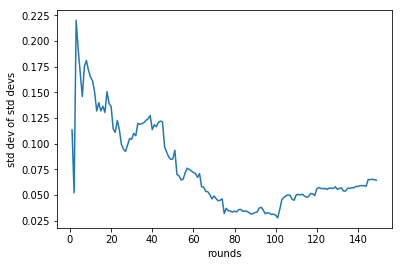

In [23]:
plt.plot(stdevs_actors[0],stdevs_actors[1])
plt.ylabel('std dev of std devs')
plt.xlabel('rounds')
plt.show()

In [24]:
avg_mus_actors = []
avg_sigmas_actors = []

for i in range(len(ref_actors)):
  avg_mus_actors.append(mean([p_list_actors[j][i].mu for j in range(len(p_list_actors))]))  
  avg_sigmas_actors.append(mean([p_list_actors[j][i].sigma for j in range(len(p_list_actors))]))
  
  

rebuilt_actors_ranking = []
for i in range(len(ref_actors)):
  rebuilt_actors_ranking.append({
      'strat': ref_actors[i],
      'mu': avg_mus_actors[i],
      'sigma': avg_sigmas_actors[i]
    })

rebuilt_actors_ranking.sort(key=lambda x: x['mu'], reverse=True)
for i in range(len(ref_actors)):
  print(rebuilt_actors_ranking[i])

  
path = 'rankings_actors.json'
if cis_filter:
  path = 'rankings_cis_actors.json'  
  
with open(path, 'w') as outfile:
  json.dump(rebuilt_actors_ranking, outfile)

{'strat': 'Governments', 'mu': 10.458918172534348, 'sigma': 0.7799445833572662}
{'strat': 'Researchers and companies', 'mu': 10.111396443929879, 'sigma': 0.7795610530737389}
{'strat': 'People', 'mu': 9.750690545864488, 'sigma': 0.7809479678777127}
